<a href="https://colab.research.google.com/github/Rahul21sai/FACE_DETECTION_USING_CNN/blob/main/face_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEPLEARNING PROJECT**

BINARY CLASSIFICATION PROBLEM

In [5]:
!pip install kaggle

-->we are trying to get the data set through api as the data set is large

In [6]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# api to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 89% 146M/163M [00:01<00:00, 106MB/s]
100% 163M/163M [00:01<00:00, 121MB/s]


In [8]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [9]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


****IMPORTING THE DEPENDENCIES****

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1164.jpg', 'with_mask_2919.jpg', 'with_mask_2636.jpg', 'with_mask_2792.jpg', 'with_mask_1829.jpg']
['with_mask_42.jpg', 'with_mask_3020.jpg', 'with_mask_599.jpg', 'with_mask_2271.jpg', 'with_mask_725.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2873.jpg', 'without_mask_872.jpg', 'without_mask_2901.jpg', 'without_mask_402.jpg', 'without_mask_2630.jpg']
['without_mask_2611.jpg', 'without_mask_2711.jpg', 'without_mask_2810.jpg', 'without_mask_3330.jpg', 'without_mask_3543.jpg']


In [13]:
print('number of with mask images:',len(with_mask_files))
print('number of without mask images:',len(without_mask_files))

number of with mask images: 3725
number of without mask images: 3828


**creating the labels for the with mask and with out mask**

with mask -->1
without mask -->0

In [14]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828


In [15]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

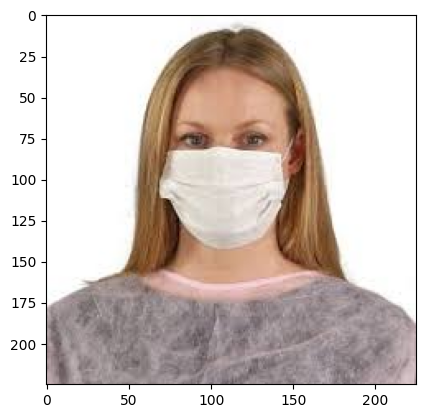

In [18]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2291.jpg')
imgplot = plt.imshow(img)
plt.show()

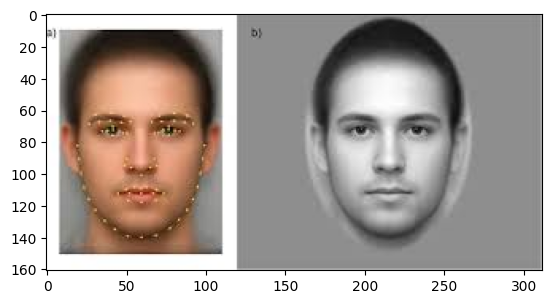

In [19]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2043.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**

1.resize the images
2.convert the images to numpy arrays

In [20]:
# convert images to numpy arrays+
with_mask_path = '/content/data/with_mask/'

data = []
for img_file in with_mask_files:


  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:


  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0]

array([[[ 58,  48,  39],
        [ 56,  46,  37],
        [ 52,  42,  33],
        ...,
        [ 88, 104, 117],
        [104, 120, 133],
        [111, 127, 140]],

       [[ 68,  57,  49],
        [ 67,  56,  47],
        [ 63,  52,  43],
        ...,
        [ 90, 105, 117],
        [105, 121, 133],
        [112, 128, 140]],

       [[ 86,  73,  65],
        [ 85,  72,  64],
        [ 83,  70,  61],
        ...,
        [ 93, 108, 118],
        [107, 124, 134],
        [114, 131, 141]],

       ...,

       [[193, 192, 197],
        [187, 186, 191],
        [175, 175, 178],
        ...,
        [158, 156, 161],
        [151, 149, 154],
        [148, 146, 151]],

       [[192, 191, 196],
        [186, 186, 190],
        [172, 174, 177],
        ...,
        [155, 153, 156],
        [147, 145, 149],
        [144, 142, 146]],

       [[190, 190, 195],
        [184, 185, 189],
        [170, 173, 176],
        ...,
        [153, 151, 153],
        [145, 143, 145],
        [142, 140, 142]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# converting image list and label list into numpy array

x = np.array(data)
y = np.array(labels)

In [27]:
type(x)
print(x.shape)

(7553, 128, 128, 3)


In [28]:
type(y)
print(y.shape)

(7553,)


****train test split****

In [29]:
#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [32]:
x_train[0]

array([[[ 26,  26,  34],
        [ 24,  24,  32],
        [ 27,  25,  35],
        ...,
        [ 80,  58,  57],
        [ 82,  56,  56],
        [ 74,  48,  47]],

       [[ 29,  29,  37],
        [ 27,  26,  34],
        [ 28,  26,  35],
        ...,
        [ 71,  45,  48],
        [ 75,  49,  52],
        [ 77,  51,  53]],

       [[ 31,  30,  38],
        [ 28,  27,  34],
        [ 26,  25,  33],
        ...,
        [ 61,  37,  43],
        [ 64,  41,  46],
        [ 63,  41,  45]],

       ...,

       [[223, 221, 234],
        [223, 221, 234],
        [223, 221, 234],
        ...,
        [158,  94,  57],
        [162, 100,  58],
        [165, 102,  59]],

       [[222, 220, 232],
        [222, 220, 232],
        [222, 220, 232],
        ...,
        [163,  99,  61],
        [163, 101,  60],
        [166, 104,  60]],

       [[222, 220, 231],
        [221, 219, 230],
        [222, 220, 231],
        ...,
        [167, 103,  65],
        [167, 105,  64],
        [170, 109,  65]]

In [33]:
x_train_scaled[0]

array([[[0.10196078, 0.10196078, 0.13333333],
        [0.09411765, 0.09411765, 0.1254902 ],
        [0.10588235, 0.09803922, 0.1372549 ],
        ...,
        [0.31372549, 0.22745098, 0.22352941],
        [0.32156863, 0.21960784, 0.21960784],
        [0.29019608, 0.18823529, 0.18431373]],

       [[0.11372549, 0.11372549, 0.14509804],
        [0.10588235, 0.10196078, 0.13333333],
        [0.10980392, 0.10196078, 0.1372549 ],
        ...,
        [0.27843137, 0.17647059, 0.18823529],
        [0.29411765, 0.19215686, 0.20392157],
        [0.30196078, 0.2       , 0.20784314]],

       [[0.12156863, 0.11764706, 0.14901961],
        [0.10980392, 0.10588235, 0.13333333],
        [0.10196078, 0.09803922, 0.12941176],
        ...,
        [0.23921569, 0.14509804, 0.16862745],
        [0.25098039, 0.16078431, 0.18039216],
        [0.24705882, 0.16078431, 0.17647059]],

       ...,

       [[0.8745098 , 0.86666667, 0.91764706],
        [0.8745098 , 0.86666667, 0.91764706],
        [0.8745098 , 0

**Buliding a CNN**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [37]:
#training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs = 50)

Epoch 1/50
170/170 [==============================] - 15s 22ms/step - loss: 0.4484 - acc: 0.8036 - val_loss: 0.3305 - val_acc: 0.8595
Epoch 2/50
170/170 [==============================] - 3s 17ms/step - loss: 0.3049 - acc: 0.8803 - val_loss: 0.3607 - val_acc: 0.8182
Epoch 3/50
170/170 [==============================] - 3s 19ms/step - loss: 0.2592 - acc: 0.9007 - val_loss: 0.2525 - val_acc: 0.8992
Epoch 4/50
170/170 [==============================] - 3s 17ms/step - loss: 0.2157 - acc: 0.9152 - val_loss: 0.2503 - val_acc: 0.9041
Epoch 5/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1816 - acc: 0.9292 - val_loss: 0.2380 - val_acc: 0.9091
Epoch 6/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1472 - acc: 0.9474 - val_loss: 0.2137 - val_acc: 0.9207
Epoch 7/50
170/170 [==============================] - 4s 24ms/step - loss: 0.1344 - acc: 0.9481 - val_loss: 0.2284 - val_acc: 0.9223
Epoch 8/50
170/170 [==============================] - 3s 18ms/step -

**MODEL EVALUATION**

In [38]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('test accuracy =',accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.4162 - acc: 0.9391
test accuracy = 0.939113199710846


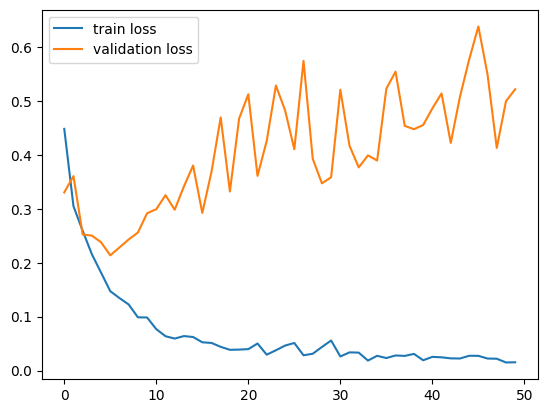

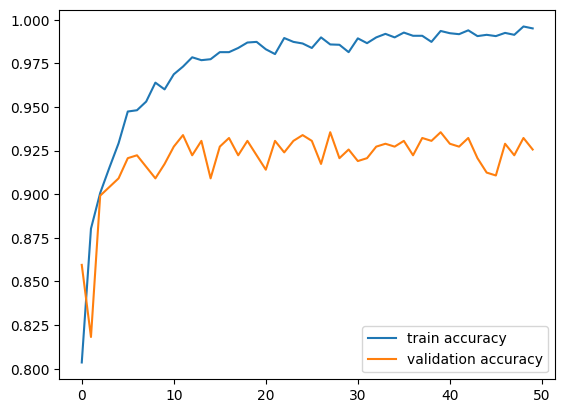

In [39]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



**predicitive system**

path of the image to be predicted:/content/data/with_mask/with_mask_725.jpg


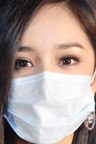

1/1 [==============================] - 0s 22ms/step
[[0.9427453  0.13071358]]
0
the person in the image is not wearing a mask


In [47]:
input_image_path = input("path of the image to be predicted:")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled= input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print("the person in the image is wearing a mask")

else:

  print("the person in the image is not wearing a mask")

path of the image to be predicted:/content/data/without_mask/without_mask_2901.jpg


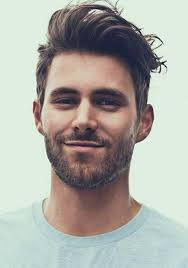

1/1 [==============================] - 0s 29ms/step
[[0.20478325 0.9466671 ]]
1
the person in the image is wearing a mask


In [46]:
input_image_path = input("path of the image to be predicted:")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled= input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print("the person in the image is wearing a mask")

else:

  print("the person in the image is not wearing a mask")